In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='EDA'></a>
## 1]Exploratory Data Analysis - Getting familiar to the dataset

In [2]:
df = pd.read_csv("../input/fraud-transaction-detection/Fraud (1).csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### 1.1]there are 5 unique types of transactions for which we need to check frauds

In [5]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### 1.2]there are no null values

In [6]:
df.isnull().values.any()

False

### 1.3] Visualisation to see which transactions are used more

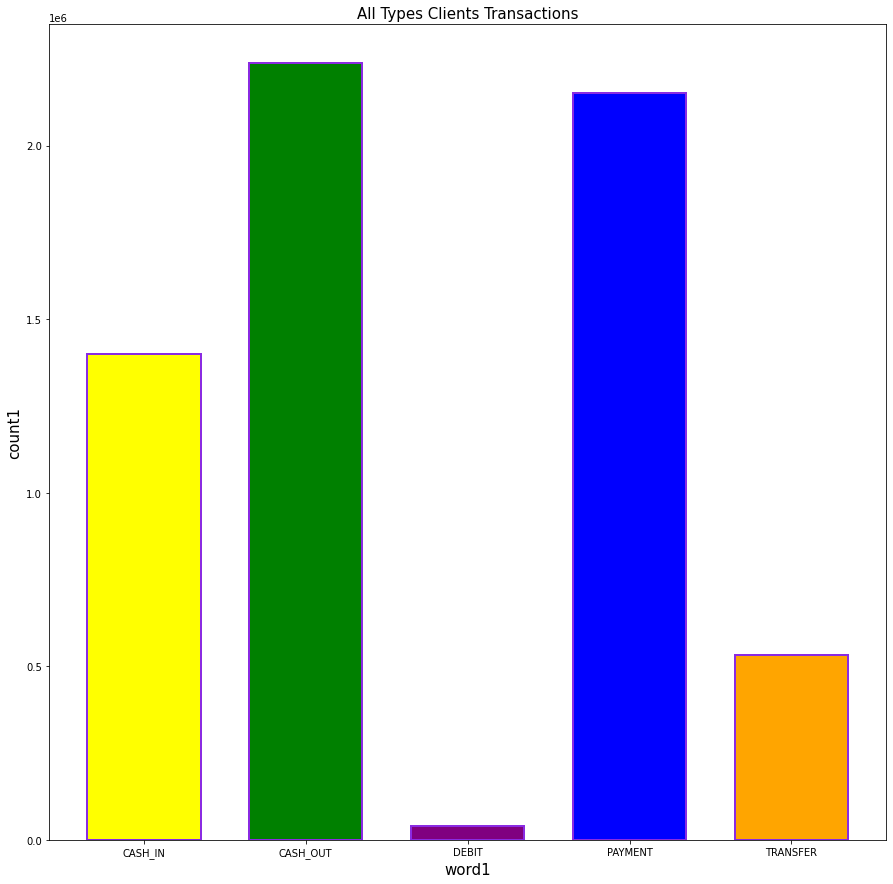

In [7]:
#counting the amount of different transaction types for both fraud and non fraud cases
x1 = df.sort_values(by = ["type"])[["type"]]
word1,count1 = np.unique(x1.values,return_counts = True)
plt.figure(figsize=[15, 15])
plt.bar(word1, count1, width=0.7, edgecolor='blueviolet',
        color=['yellow','green','purple','blue','orange'], linewidth=2)
plt.title('All Types Clients Transactions', fontsize=15)
plt.xlabel('word1', fontsize=15)
plt.ylabel('count1', fontsize=15)
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

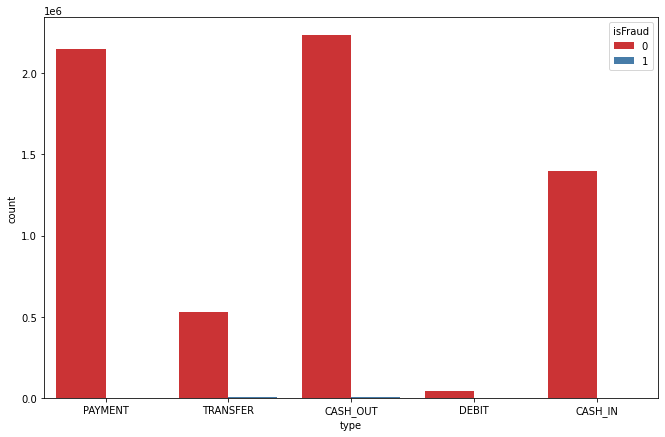

In [8]:
# counting fraud cases in each transaction type
plt.figure(figsize=(11,7))
sns.countplot(x='type', hue='isFraud', data=df, palette='Set1')

### 1.4]From the visualisation above we find out for which types of transaction, the column's values in isFraud equals to 1 or 0. Let's also confirm the same thing numerically below


In [9]:
# number of transfer transactions where isfraud = 1
df[(df['type']=='TRANSFER')&(df['isFraud']==1)]['isFraud'].sum()

4097

In [10]:
# number of cash out transactions where isfraud = 1
df[(df['type']=='CASH_OUT')&(df['isFraud']==1)]['isFraud'].sum()

4116

In [11]:
# number of cash in transactions where isfraud = 1
df[(df['type']=='CASH_IN')&(df['isFraud']==1)]['isFraud'].sum()

0

In [12]:
# number of debit transactions where isfraud = 1
df[(df['type']=='DEBIT')&(df['isFraud']==1)]['isFraud'].sum()

0

In [13]:
# number of payment transactions where isfraud = 1
df[(df['type']=='PAYMENT')&(df['isFraud']==1)]['isFraud'].sum()

0

### 1.5]We will do the same thing for isflaggedfraud column for each payment type

In [14]:
df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==1)]['isFlaggedFraud'].sum()

16

In [15]:
df[(df['type']=='CASH_OUT')&(df['isFlaggedFraud']==1)]['isFlaggedFraud'].sum()

0

In [16]:
df[(df['type']=='CASH_IN')&(df['isFlaggedFraud']==1)]['isFlaggedFraud'].sum()

0

In [17]:
df[(df['type']=='PAYMENT')&(df['isFlaggedFraud']==1)]['isFlaggedFraud'].sum()

0

In [18]:
df[(df['type']=='DEBIT')&(df['isFlaggedFraud']==1)]['isFlaggedFraud'].sum()

0

### 1.6]Checking whether isFlaggedFraud depends on a customer transacting more than once?  

In [19]:
#the customers who paid the money are unique as there are only 16 isflaggedfraud = 1 in the tranfer type
df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==1)]['nameOrig'].nunique()

16

In [20]:
#the customers who recieved the money are unique as there are only 16 isflaggedfraud = 1 in the tranfer type
df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==1)]['nameDest'].nunique()

16

### 1.7] isFlaggedFraud - An illegal attempt in this dataset is an attempt to transfer more than 200000 in a single transaction. Let's see if this holds true 

In [21]:
df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==1)]['amount'].max()

10000000.0

In [22]:
df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==1)]['amount'].min()

353874.22

In [23]:
df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==0)]['amount'].min()

2.6

In [24]:
df[(df['type']=='TRANSFER')&(df['isFlaggedFraud']==0)]['amount'].max()

92445516.64

<a id='EDAConc'></a>
## 2] Conclusion from EDA
### 2.1] About isFraud: 
*  Only Cashout and transfer types have fraud cases. 
*  So we will drop the debit, cashin and payments transaction from our dataset as we have no use for them and it will also shorten the table

### 2.2]About isflaggedfraud:
*  isFlaggedFraud is set 1 just 16 times in a meaningless way
*  isFlaggedFraud being set 1 cannot be thresholded on amount transferred since the corresponding range of values overlaps with that for TRANSFERs where isFlaggedFraud is set 0
*  it also does not hold true for the definition of the column i.e (An illegal attempt in this dataset is an attempt to transfer more than 200000 in a single transaction)
*  isFlaggedFraud is set 1 for unique customers. There are no same customers who are being flagged
*  Thus we can treat isFlaggedFraud as insignificant and discard it in the dataset without loosing information.

<a id='cleaning'></a>
## 3] Data cleaning
### 3.1] Droping useless attributes - payment, debit, cash in transactions and isflagged fraud column

In [25]:
dt= pd.read_csv("../input/fraud-transaction-detection/Fraud (1).csv")
dt.drop(dt[dt.type == 'PAYMENT'].index, inplace=True)
dt.drop(dt[dt.type == 'DEBIT'].index, inplace=True)
dt.drop(dt[dt.type == 'CASH_IN'].index, inplace=True)
dt.drop('isFlaggedFraud', axis=1, inplace=True)
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0


<a id='percent'></a>
### 3.2] Finding the number and percent of fraud and legit transactions in the cleaned data

In [26]:
#no. of transactions in the cleaned data
len(dt)

2770409

In [27]:
legit = len(dt[dt.isFraud == 0])
fraud = len(dt[dt.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  2762196
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.7035 %
Percentage of Fraud transactions: 0.2965 %


### 3.3] Making the data suitable for a ML model

In [28]:
#making a new dataframe for droping name of the customer columns
df2=dt.copy()
df2.drop(['nameOrig','nameDest'], axis=1, inplace=True)
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [29]:
#Giving binary values to type column 
df3 = df2.replace({'type':{'TRANSFER':1, 'CASH_OUT':0}})
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,181.0,0.0,0.0,0.00,1
3,1,0,181.00,181.0,0.0,21182.0,0.00,1
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0


<a id='colinearity'></a>
### 3.4] Checking for colinearity

<AxesSubplot:>

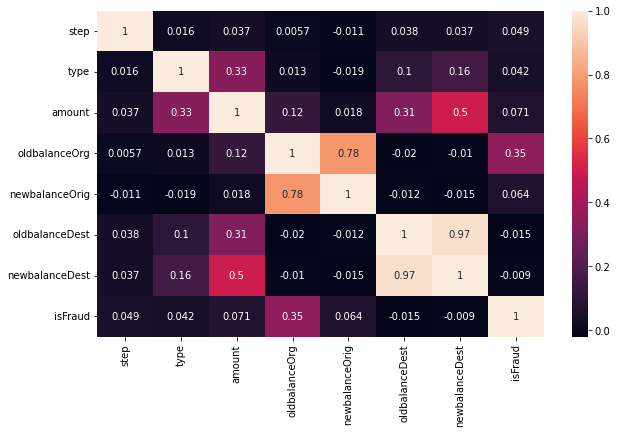

In [30]:
corr=df3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [31]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df3)

,variables,VIF
0,step,1.303409
1,type,1.339420
2,amount,5.321689
3,oldbalanceOrg,3.544097
4,newbalanceOrig,2.993498
5,oldbalanceDest,65.292934
6,newbalanceDest,80.758186
7,isFraud,1.302325


<a id='3.5'></a>
### 3.5] We can see that (oldbalanceOrg, newbalanceOrig, newbalanceDest, oldbalanceDest) are highly correlated. Can be seen from the heatmap and VIF
### We will alter these columns and make them usable for our model.

In [32]:
df3['Actual_amount_orig'] = df3.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df3['Actual_amount_dest'] = df3.apply(lambda x: x['newbalanceDest'] - x['oldbalanceDest'],axis=1)

#Dropping columns
new_df = df3.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest', 'step'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,1.222515
1,amount,5.123265
2,isFraud,1.293728
3,Actual_amount_orig,1.376070
4,Actual_amount_dest,4.661681


<AxesSubplot:>

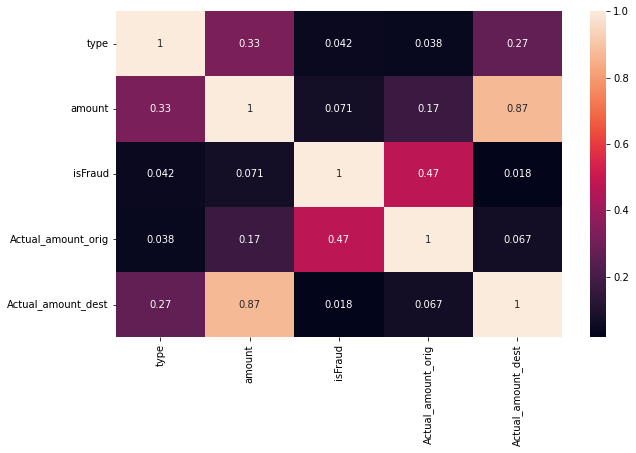

In [33]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [34]:
new_df2=new_df.copy()

Y = new_df2["isFraud"]
X = new_df2.drop(["isFraud"], axis= 1)
new_df2.head()

,type,amount,isFraud,Actual_amount_orig,Actual_amount_dest
2,1,181.00,1,181.0,0.00
3,0,181.00,1,181.0,-21182.00
15,0,229133.94,0,15325.0,46430.44
19,1,215310.30,0,705.0,-22425.00
24,1,311685.89,0,10835.0,2712905.89


<a id='model'></a>
### 4] Model Building

### will try out different classification models to see which gives the best results

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1939286, 4)
Shape of X_test:  (831123, 4)


<a id='LR'></a>
### 4.1] Logistic Regression

In [37]:
lm = LogisticRegression()
lm.fit(X_train, Y_train)
pr = lm.predict(X_test)
print(classification_report(Y_test,pr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.36      0.50      0.42      2496

    accuracy                           1.00    831123
   macro avg       0.68      0.75      0.71    831123
weighted avg       1.00      1.00      1.00    831123



In [38]:
print("Logistic Regression")
tn, fp, fn, tp = confusion_matrix(Y_test, pr).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

Logistic Regression
True Positives: 1247
False Positives: 2242
True Negatives: 826385
False Negatives: 1249


<a id='DT'></a>
### 4.2]DECISION TREE

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.82397310626706


In [40]:
print(" Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

 Decision Tree
True Positives: 1765
False Positives: 732
True Negatives: 827895
False Negatives: 731


In [41]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.71      0.71      0.71      2496

    accuracy                           1.00    831123
   macro avg       0.85      0.85      0.85    831123
weighted avg       1.00      1.00      1.00    831123



## 5] Conclusion
-  Here we can see that decision tree performs better than logistic regression.

1.  TP(Decision Tree) > TP(logistic regression) 
2.  FP(Decision Tree) < FP(logistic regression) 
3.  TN(Decision Tree) > TN(logistic regression) 
4.  FN(Decision Tree) < FN(logistic regression)

-  Also from the 2 classification reports, the decision tree has better f1 score and precision

### Note - I was not able to test a random forests classifier because it was taking a lot of time to run and could'nt figure out any alternative

# Answering the task questions

1. Data cleaning including missing values, outliers and multi-collinearity. 
   -  Dropped the rows that were not going to be used in the model building. Check out section <a href='#cleaning'>3</a>.
   -  Dropped the columns that had collinearity and replaced them with new column. Check out section <a href='#colinearity'>3.4</a>.
2. Describe your fraud detection model in elaboration. 
   - These results <a href='#percent'>3.2</a> prove that this it is a highly unbalanced data as Percentage of Legit transactions= 99.7% and Percentage of Fraud transactions= 0.29%.
   - We tested Logistic regression and decision tree algorithms and proceeded with decision trees which works best with strongly imbalanced classes. 
3. How did you select variables to be included in the model?
   - We dropped the isFlaggedFraud column based on our conclusion in section <a href='#EDAConc'>2</a>
   - Using the VIF values and correlation results in section <a href='#colinearity'>3.4</a>, we droped corelated independent variables and kept the ones which were better correlated to the isFraud Attribute.
4. Demonstrate the performance of the model by using best set of tools.
   - Used confusion matrix and classification report to see the performance of trained models. Check out section <a href='#LR'>4.1</a> and <a href='#DT'>4.2</a>.
5. What are the key factors that predict fraudulent customer? 
   - In the section <a href='#3.5'>3.5</a> we created 2 actual balance columns for the origin and destination accounts. They show a correlation with the target variable. Hence they are used as predictors

7. What kind of prevention should be adopted while company update its infrastructure?
   - Adding extra layer of security to their website/ app.
   - Vigilant monitoring of the fraud indicators.
